In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/log.csv')

In [ ]:
df.head()

,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
0,195.0,226.0848,0.4076,69.8953,132.5052,-0.3548,0.1863,5.1090,1.8878,1.6973,-0.6303,59.2216,30.0657,60.4576
1,195.5,223.5031,0.4063,69.2303,123.6225,-0.3619,0.1867,5.1031,1.8882,1.6791,-0.6409,60.2877,26.7625,54.1495
2,196.0,221.4560,0.4047,68.4478,116.9258,-0.3668,0.1860,5.0872,1.8878,1.6585,-0.6539,61.4914,27.6017,51.9944
3,196.5,219.8248,0.4033,67.4843,111.7925,-0.3613,0.1867,5.0881,1.8884,1.6435,-0.6649,62.3711,31.5870,52.9645
4,197.0,218.1438,0.4023,66.3013,106.7821,-0.3569,0.1870,5.0972,1.8883,1.6390,-0.6705,62.6343,35.8251,54.9659


In [100]:
data = df.values

In [62]:
data.shape

(8739, 14)

In [101]:
for i in range(1, data.shape[1]):
  mn = 0
  for j in range(data.shape[0]):
    mn = mn*0.2 + 0.8*data[j,i]
    data[j,i] = mn

In [102]:
import matplotlib.pyplot as plt

(0.0, 200.0)

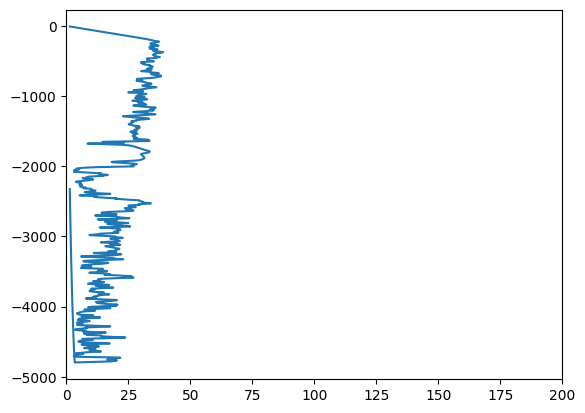

In [103]:
plt.plot(data[:,-2], -1*data[:,0])
plt.xlim(0, 200)

# Making a model to take input the vales of all logs and predict the value of Density log

In [104]:
data_train = data[:7000]
data_test = data[7000:]

In [105]:
x_train = data_train[:,:-1]
y_train = data_train[:,-1]
x_test = data_test[:,:-1]
y_test = data_test[:,-1]

In [106]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=(x_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout with 20% rate
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=50)
model.evaluate(x_test, y_test)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 67086.9453
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5037.7495
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2989.9121
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2170.7253
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1512.3456
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1132.5605
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 930.7968
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 839.2136
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 750.8201
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 669.1985
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 684.1451
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 607.9276
Epoch 13/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 531.8430
Epoch 14/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 473.4068
Epoch 15/50
219/219 ━━━━━━━━━━━━━

841.8491821289062

In [ ]:
model.evaluate(x_test, y_test)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1489.8074


2718.2626953125

In [142]:
yhat = model.predict(x_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [143]:
y = y_train

In [144]:
acc = 0
diff = 0
sm = 0
for i in range(len(y)):
  diff += abs(yhat[i,0]-y[i])
  sm += y[i]
acc = 1 - diff/sm

In [145]:
print(acc)

0.7889017299274359


We got accuracy of 78.89%